# Purpose
The purpose of this notebook is two-fold. In it, I aim to:
1. Reproduce the MNL model used in "Brownstone, Davide and Train, Kenneth (1999). 'Forecasting new product penetration with flexible substitution patterns'. Journal of Econometrics 89: 109-129." (p. 121).
2. 'Check' the MNL model for lack-of-fit between observable features of the data and predictions from the model.
3. Produce 7 plots to illustrate the general model-checking procedure.


In [1]:
import sys
from collections import OrderedDict

import scipy.stats
import pandas as pd
import numpy as np

import pylogit as pl

sys.path.insert(0, '../src')
from visualization import predictive_viz as viz

%matplotlib inline

# Load the car data

In [2]:
car_df = pd.read_csv("../data/processed/model_ready_car_data.csv")

# Create the utility specification

In [3]:
car_mnl_spec, car_mnl_names = OrderedDict(), OrderedDict()

cols_and_display_names =\
    [('price_over_log_income', 'Price over log(income)'),
     ('range_over_100', 'Range (units: 100mi)'),
     ('acceleration_over_10', 'Acceleration (units: 0.1sec)'),
     ('top_speed_over_100', 'Top speed (units: 0.01mph)'),
     ('pollution', 'Pollution'),
     ('vehicle_size_over_10', 'Size'),
     ('big_enough', 'Big enough'),
     ('luggage_space', 'Luggage space'),
     ('tens_of_cents_per_mile', 'Operation cost'),
     ('station_availability', 'Station availability'),
     ('sports_utility_vehicle', 'Sports utility vehicle'),
     ('sports_car', 'Sports car'),
     ('station_wagon', 'Station wagon'),
     ('truck', 'Truck'),
     ('van', 'Van'),
     ('electric', 'EV'),
     ('electric_commute_lte_5mi', 'Commute < 5 & EV'),
     ('electric_and_college', 'College & EV'),
     ('compressed_natural_gas', 'CNG'),
     ('methanol', 'Methanol'),
     ('methanol_and_college', 'College & Methanol')]
    
for col, display_name in cols_and_display_names:
    car_mnl_spec[col] = 'all_same'
    car_mnl_names[col] = display_name


# Estimate the MNL model

In [4]:
# Initialize the mnl model
car_mnl = pl.create_choice_model(data=car_df,
                                 alt_id_col='alt_id',
                                 obs_id_col='obs_id',
                                 choice_col='choice',
                                 specification=car_mnl_spec,
                                 model_type='MNL',
                                 names=car_mnl_names)

# Create the initial variables for model estimation
num_vars = len(car_mnl_names)
initial_vals = np.zeros(num_vars)

# Estimate the mnl model
fit_vals = car_mnl.fit_mle(initial_vals,
                           method='L-BFGS-B',
                           just_point=True)['x']
# Note ridge=1e-7 produces the same results as non-regularized MLE
car_mnl.fit_mle(fit_vals, method='BFGS')

# Look at the estimation results
car_mnl.get_statsmodels_summary()

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  RuntimeWarning)


Log-likelihood at zero: -8,338.8486
Initial Log-likelihood: -7,391.8638
Estimation Time for Point Estimation: 0.15 seconds.
Final log-likelihood: -7,391.8300


/Users/timothyb0912/anaconda/lib/python2.7/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      choice   No. Observations:                4,654
Model:             Multinomial Logit Model   Df Residuals:                    4,633
Method:                                MLE   Df Model:                           21
Date:                     Sat, 25 May 2019   Pseudo R-squ.:                   0.114
Time:                             01:00:35   Pseudo R-bar-squ.:               0.111
AIC:                            14,825.660   Log-Likelihood:             -7,391.830
BIC:                            14,961.015   LL-Null:                    -8,338.849
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Price over log(income)          -0.1854      0.027     -6.796      0.000      -0.239      -0.132
Range (units: 100mi)             0.3501      0.027     13.052      0.000       0.298       0.403
Acceleration (units: 0.1sec)    -0.7160      0.111     -6.472      0.000      -0.933      -0.499
Top speed (units: 0.01mph)       0.2612      0.081      3.228      0.001       0.103       0.420
Pollution                       -0.4441      0.102     -4.367      0.000      -0.643      -0.245
Size                             0.9345      0.316      2.953      0.003       0.314       1.555
Big enough                       0.1432      0.077      1.853      0.064      -0.008       0.295
Luggage space                    0.5009      0.191      2.623      0.009       0.127       0.875
Operation cost                  -0.7679      0.076    -10.131      0.000      -0.916      -0.619
Station availability             0.4133      0.096      4.294      0.000       0.225       0.602
Sports utility vehicle           0.8201      0.141      5.830      0.000       0.544       1.096
Sports car                       0.6370      0.148      4.298      0.000       0.347       0.928
Station wagon                   -1.4367      0.062    -23.139      0.000      -1.558      -1.315
Truck                           -1.0168      0.049    -20.753      0.000      -1.113      -0.921
Van                             -0.7989      0.047    -16.864      0.000      -0.892      -0.706
EV                              -0.1786      0.172     -1.041      0.298      -0.515       0.158
Commute < 5 & EV                 0.1983      0.084      2.374      0.018       0.035       0.362
College & EV                     0.4426      0.109      4.058      0.000       0.229       0.656
CNG                              0.3450      0.092      3.744      0.000       0.164       0.526
Methanol                         0.3134      0.103      3.051      0.002       0.112       0.515
College & Methanol               0.2284      0.089      2.576      0.010       0.055       0.402
================================================================================================
"""

In [5]:
print(np.round(pd.concat([car_mnl.params,
                    car_mnl.standard_errors],
                   axis=1),
               decimals=3).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  parameters &  std\_err \\
\midrule
Price over log(income)       &      -0.185 &    0.027 \\
Range (units: 100mi)         &       0.350 &    0.027 \\
Acceleration (units: 0.1sec) &      -0.716 &    0.111 \\
Top speed (units: 0.01mph)   &       0.261 &    0.081 \\
Pollution                    &      -0.444 &    0.102 \\
Size                         &       0.934 &    0.316 \\
Big enough                   &       0.143 &    0.077 \\
Luggage space                &       0.501 &    0.191 \\
Operation cost               &      -0.768 &    0.076 \\
Station availability         &       0.413 &    0.096 \\
Sports utility vehicle       &       0.820 &    0.141 \\
Sports car                   &       0.637 &    0.148 \\
Station wagon                &      -1.437 &    0.062 \\
Truck                        &      -1.017 &    0.049 \\
Van                          &      -0.799 &    0.047 \\
EV                           &      -0.179 &    0.172 \\
Commute < 5 \& EV

# Replication Results

The original modeling results have been replicated. To do so, I needed to change the vehicle fuel types in the mlogit data to correct a likely transcription error.

# MNL Model Checking

In [6]:
# Simulate values from the sampling distribution of coefficients
cov_matrix = np.linalg.inv(-1 * car_mnl.hessian)
mnl_sampling_dist =\
    scipy.stats.multivariate_normal(mean=car_mnl.params.values,
                                    cov=cov_matrix)

In [7]:
# Take Draws from the sampling distribution
num_draws = 1001
np.random.seed(325)
simulated_coefs = mnl_sampling_dist.rvs(num_draws)
simulated_coefs.shape

(1001, 21)

In [8]:
# Predict the model probabilities
simulated_probs =\
    car_mnl.predict(car_df,
                    param_list=[simulated_coefs.T, None, None, None])

# Simulate y from the sampling distribution
likelihood_sim_y =\
    viz.simulate_choice_vector(simulated_probs,
                               car_df['obs_id'].values,
                               rseed=1122018)

SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdTaW11bGF0aW5nIENob2ljZXMnLCBtYXg9NDY1NCwgc3R5bGU9UHJvZ3Jlc3NTdHlsZShkZXNjcmlwdGnigKY=


# Make the seven desired plots

In [9]:
import seaborn as sbn
import matplotlib.pyplot as plt

### 1. Log-Likelihood plot

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


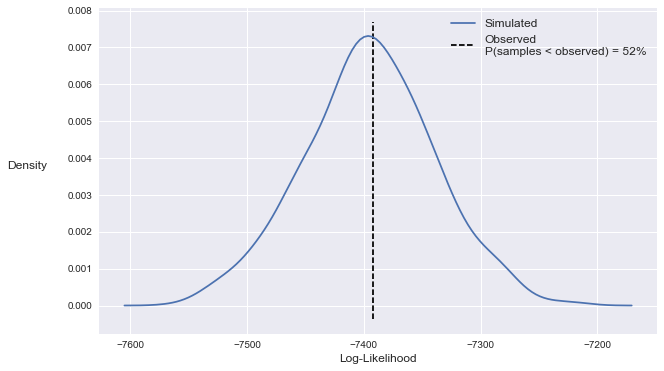

In [10]:
reload(viz)

sim_log_likes =\
    viz.compute_prior_predictive_log_likelihoods(likelihood_sim_y,
                                                 car_df,
                                                 "choices",
                                                 car_mnl)

log_like_path =\
    None #'../reports/figures/log-predictive-vehicle-choice-mnl.pdf'
viz.plot_predicted_log_likelihoods(sim_log_likes,
                                   car_mnl.llf,
                                   output_file=log_like_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


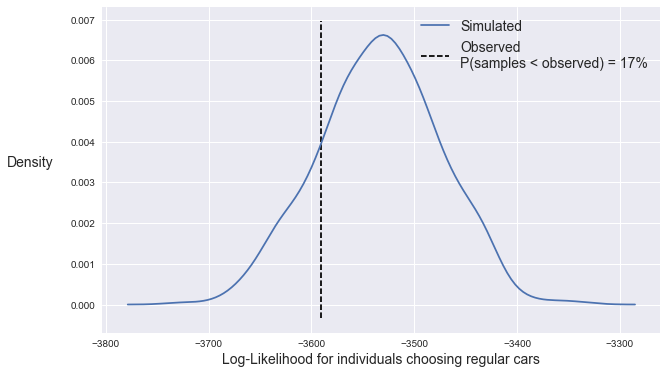

In [13]:
body = 'regcar'
filter_idx = (car_df.body_type == body).values

current_df = car_df.loc[filter_idx]
current_probs = car_mnl.long_fitted_probs[filter_idx]
current_choices = car_mnl.choices[filter_idx]
current_sim_y = likelihood_sim_y[filter_idx, :]

current_sim_log_likes =\
    current_sim_y.T.dot(np.log(current_probs))
current_obs_log_likes =\
    current_choices.T.dot(np.log(current_probs))

current_log_like_path =\
    None #'../reports/figures/original_mnl_log_likelihood_plot_regcar.jpeg'
current_x_label = 'Log-Likelihood for individuals choosing regular cars'
viz.plot_predicted_log_likelihoods(current_sim_log_likes,
                                   current_obs_log_likes,
                                   x_label=current_x_label,
                                   fontsize=14,
                                   output_file=current_log_like_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


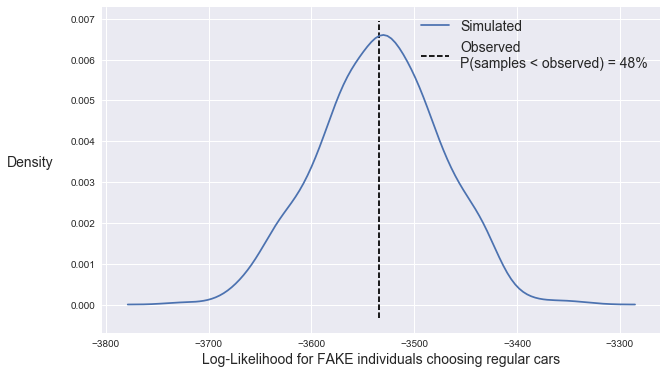

In [15]:
body = 'regcar'
filter_idx = (car_df.body_type == body).values

current_df = car_df.loc[filter_idx]
current_probs = car_mnl.long_fitted_probs[filter_idx]
current_choices = likelihood_sim_y[filter_idx, 0]
current_sim_y = likelihood_sim_y[filter_idx, 1:]

current_sim_log_likes =\
    current_sim_y.T.dot(np.log(current_probs))
current_obs_log_likes =\
    current_choices.T.dot(np.log(current_probs))

current_log_like_path =\
    None #'../reports/figures/original_mnl_log_likelihood_plot_regcar.jpeg'
current_x_label = 'Log-Likelihood for FAKE individuals choosing regular cars'
viz.plot_predicted_log_likelihoods(current_sim_log_likes,
                                   current_obs_log_likes,
                                   x_label=current_x_label,
                                   fontsize=14,
                                   output_file=current_log_like_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matp

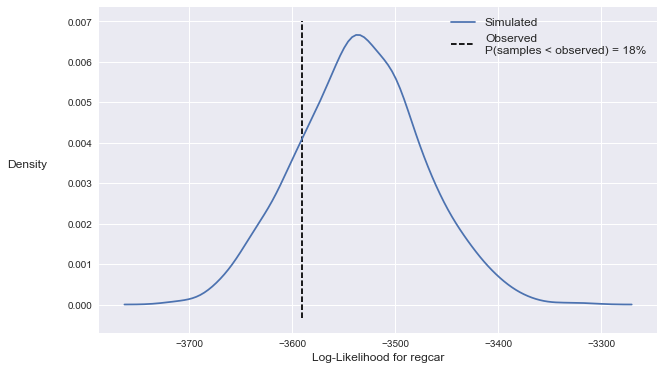

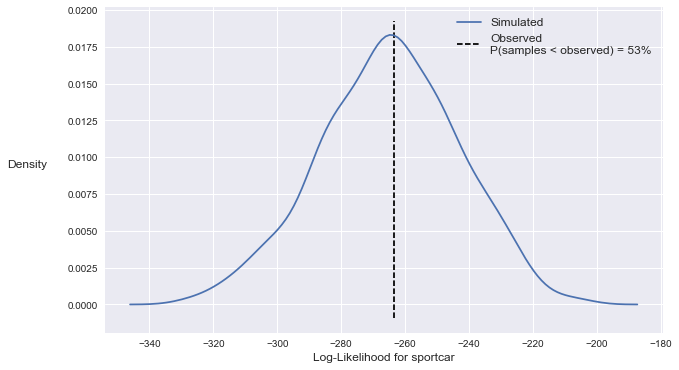

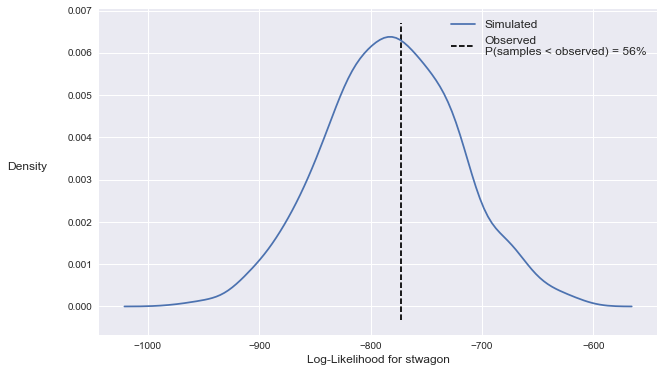

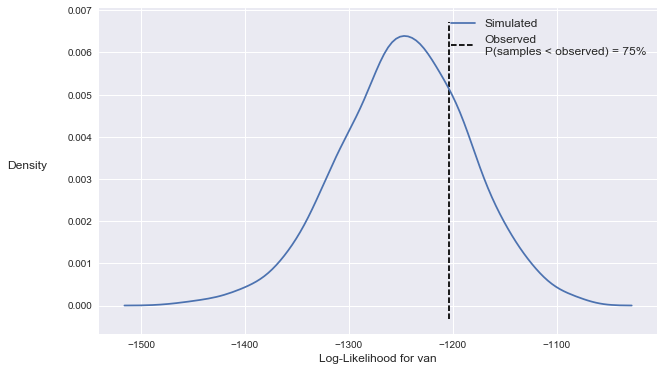

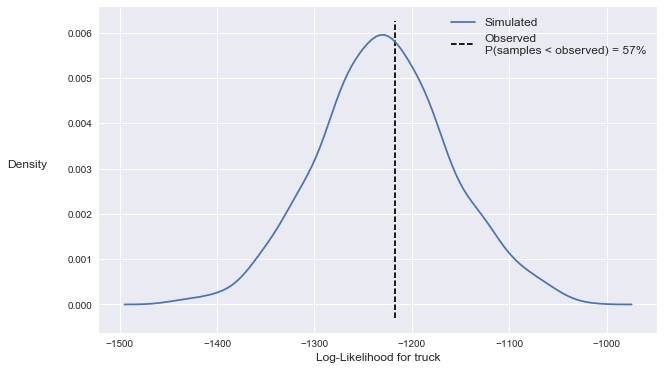

In [58]:
reload(viz)

for body in ['regcar', 'sportcar', 'stwagon', 'van', 'truck']:
    filter_idx = (car_df.body_type == body).values

    current_df = car_df.loc[filter_idx]
    current_probs = car_mnl.long_fitted_probs[filter_idx]
    current_choices = car_mnl.choices[filter_idx]
    current_sim_y = likelihood_sim_y[filter_idx, :]

    current_sim_log_likes =\
        current_sim_y.T.dot(np.log(current_probs))
    current_obs_log_likes =\
        current_choices.T.dot(np.log(current_probs))

    current_log_like_path = None
    viz.plot_predicted_log_likelihoods(current_sim_log_likes,
                                       current_obs_log_likes,
                                       x_label='Log-Likelihood for {}'.format(body),
                                       output_file=current_log_like_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


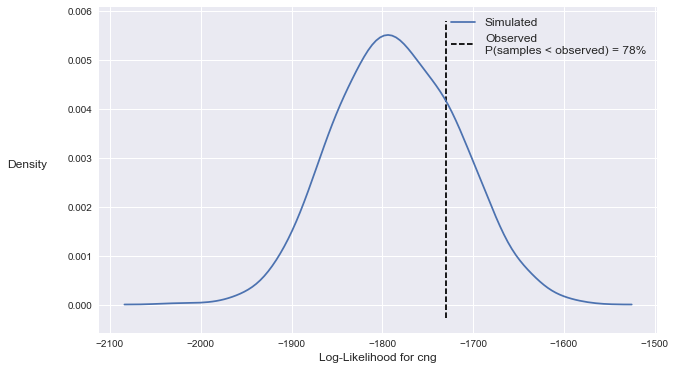

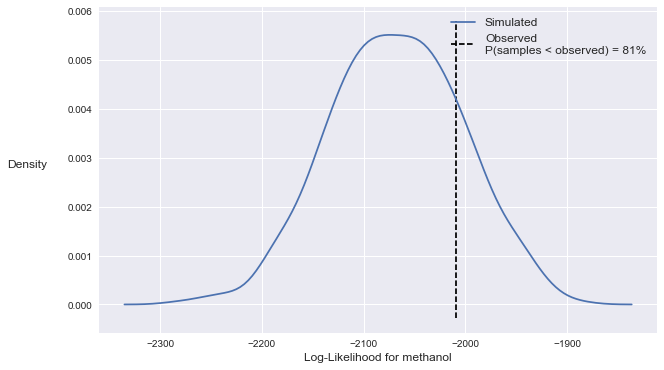

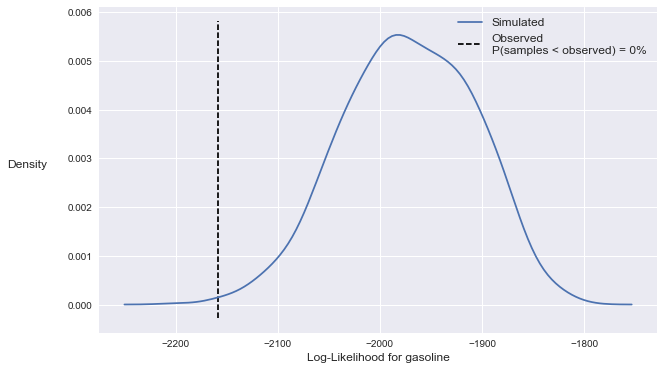

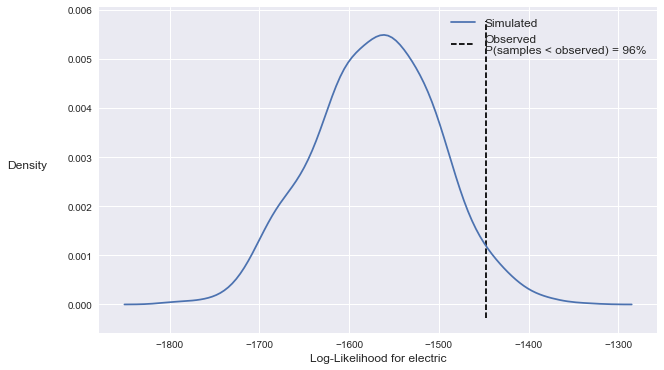

In [19]:
reload(viz)

for fuel in ['cng', 'methanol', 'gasoline', 'electric']:
    filter_idx = (car_df.fuel_type == fuel).values

    current_df = car_df.loc[filter_idx]
    current_probs = car_mnl.long_fitted_probs[filter_idx]
    current_choices =\
        likelihood_sim_y[filter_idx, 5] # car_mnl.choices[filter_idx]
    current_sim_y = likelihood_sim_y[filter_idx, 1:]

    current_sim_log_likes =\
        current_sim_y.T.dot(np.log(current_probs))
    current_obs_log_likes =\
        current_choices.T.dot(np.log(current_probs))

    current_log_like_path = None
    viz.plot_predicted_log_likelihoods(current_sim_log_likes,
                                       current_obs_log_likes,
                                       x_label='Log-Likelihood for {}'.format(fuel),
                                       output_file=current_log_like_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


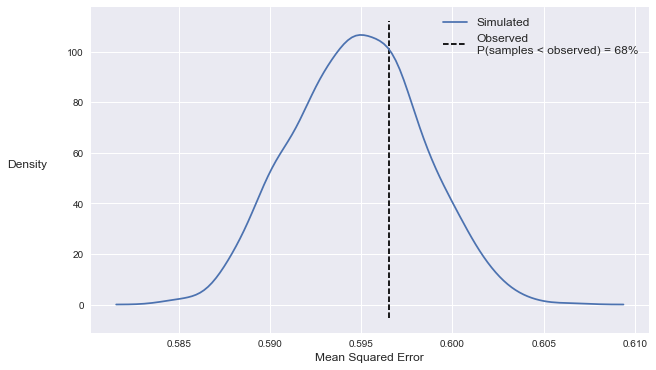

In [28]:
num_choices = car_mnl.choices.sum()

sim_mse = (likelihood_sim_y * 
           (likelihood_sim_y - 
            car_mnl.long_fitted_probs[:, None])**2).sum(axis=0) / num_choices

obs_mse = (car_mnl.choices * 
           (car_mnl.choices - 
            car_mnl.long_fitted_probs)**2).sum() / num_choices

mse_path = None
viz.plot_predicted_log_likelihoods(sim_mse,
                                   obs_mse,
                                   x_label='Mean Squared Error',
                                   output_file=mse_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matp

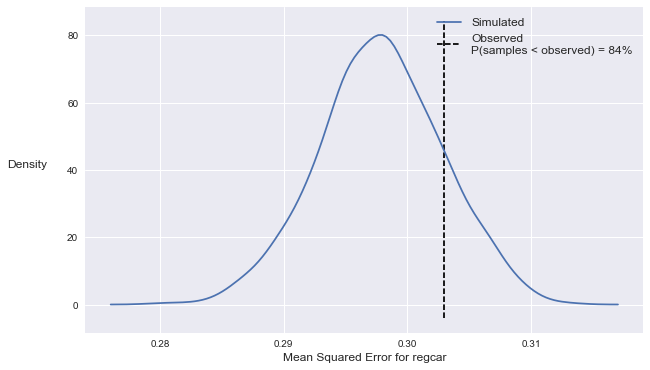

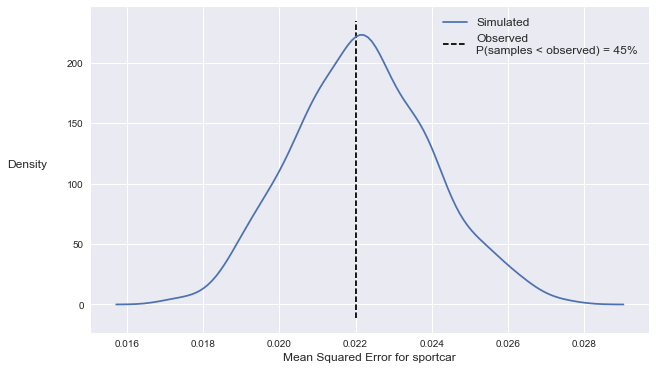

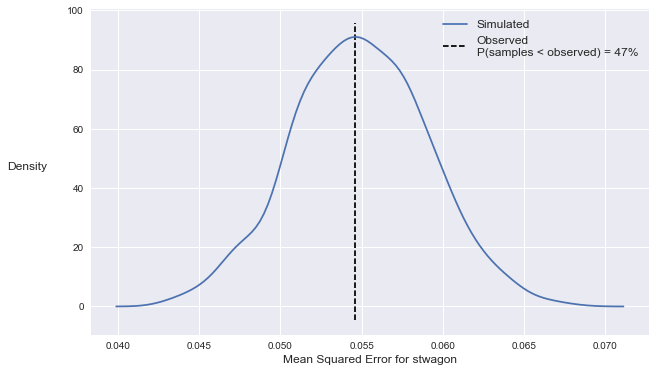

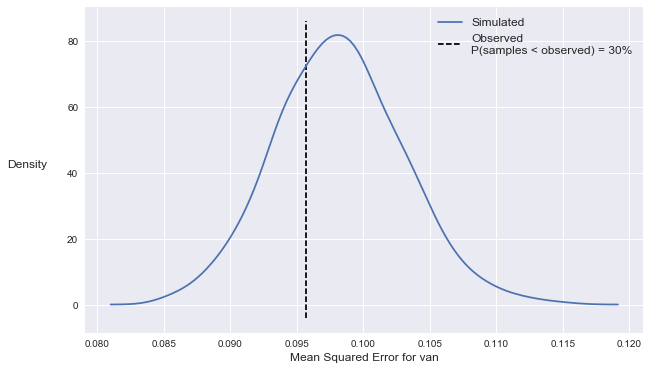

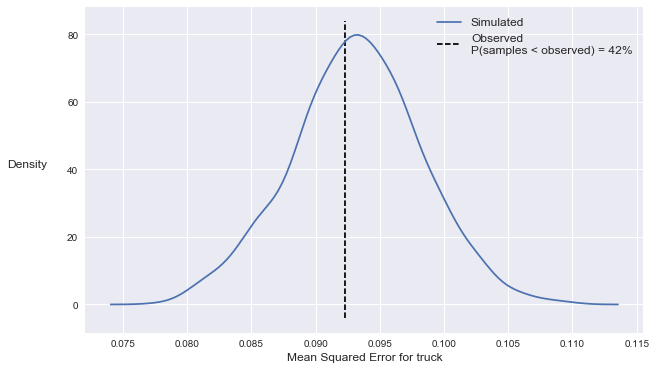

In [59]:
for body in ['regcar', 'sportcar', 'stwagon', 'van', 'truck']:
    filter_idx = (car_df.body_type == body).values

    current_df = car_df.loc[filter_idx]
    current_probs = car_mnl.long_fitted_probs[filter_idx]
    current_choices = car_mnl.choices[filter_idx]
    current_sim_y = likelihood_sim_y[filter_idx, :]
    
    sim_mse = (current_sim_y *
               ((current_sim_y - 
                 current_probs[:, None])**2)).sum(axis=0) / num_choices

    obs_mse = (current_choices *
               ((current_choices - 
                 current_probs)**2)).sum() / num_choices

    mse_path = None
    viz.plot_predicted_log_likelihoods(sim_mse,
                                       obs_mse,
                                       x_label='Mean Squared Error for {}'.format(body),
                                       output_file=mse_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


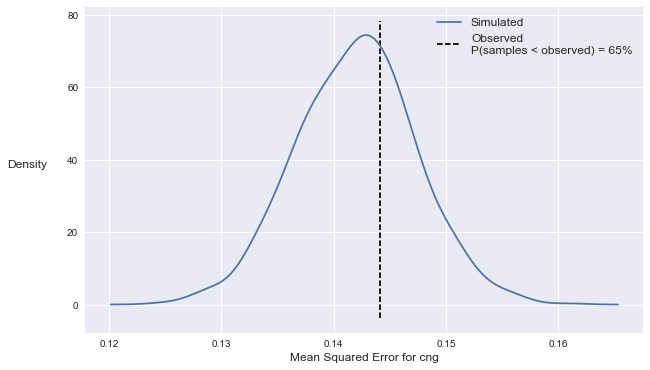

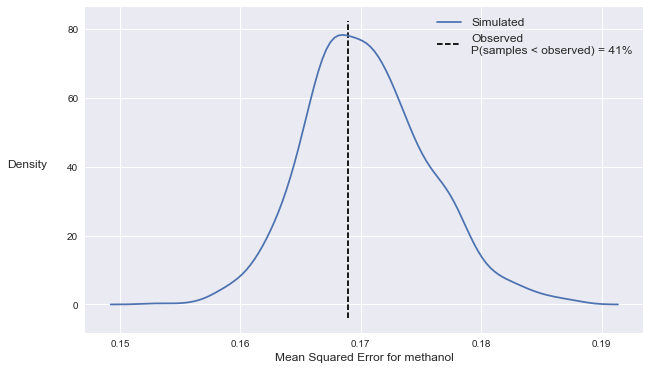

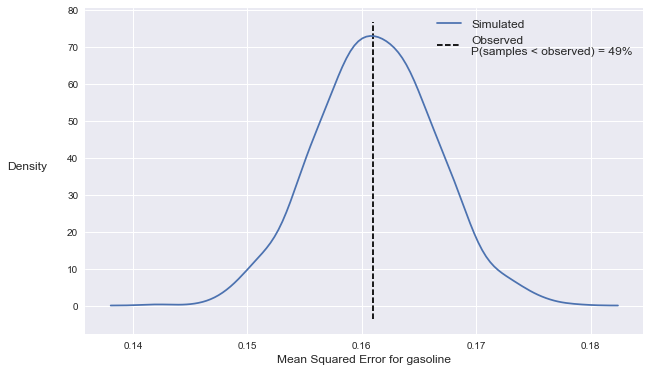

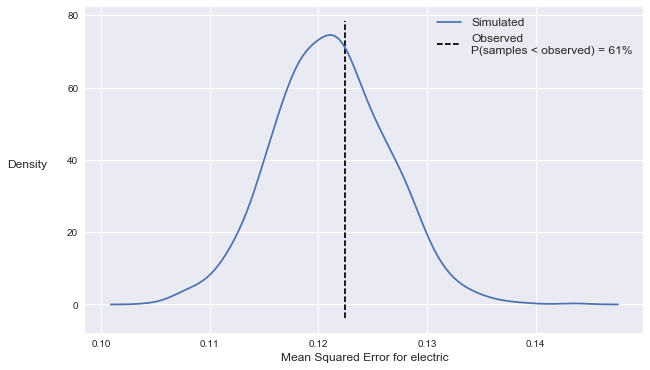

In [62]:
for fuel in ['cng', 'methanol', 'gasoline', 'electric']:
    filter_idx = (car_df.fuel_type == fuel).values

    current_df = car_df.loc[filter_idx]
    current_probs = car_mnl.long_fitted_probs[filter_idx]
    current_choices = car_mnl.choices[filter_idx]
    current_sim_y = likelihood_sim_y[filter_idx, :]
    
    sim_mse = (current_sim_y *
               ((current_sim_y - 
                 current_probs[:, None])**2)).sum(axis=0) / num_choices

    obs_mse = (current_choices *
               ((current_choices - 
                 current_probs)**2)).sum() / num_choices

    mse_path = None
    viz.plot_predicted_log_likelihoods(sim_mse,
                                       obs_mse,
                                       x_label='Mean Squared Error for {}'.format(fuel),
                                       output_file=mse_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matp

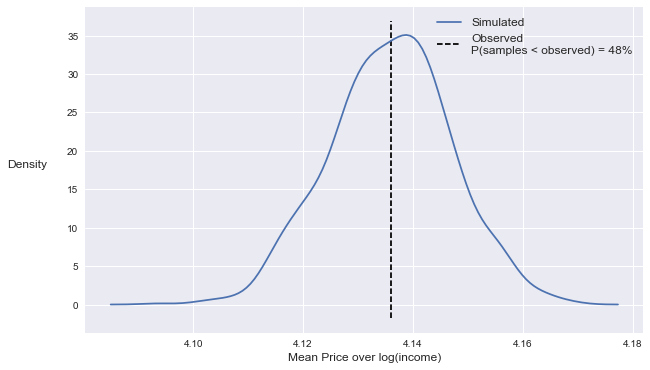

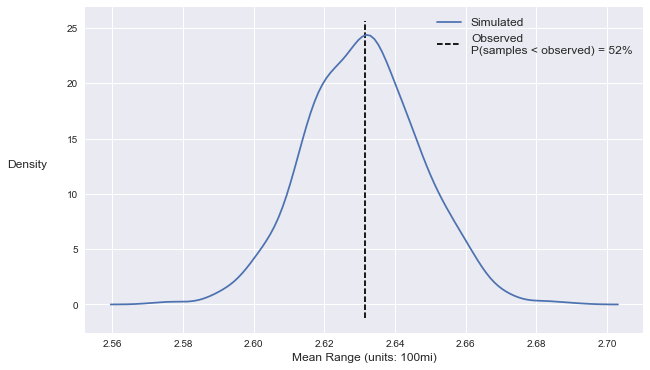

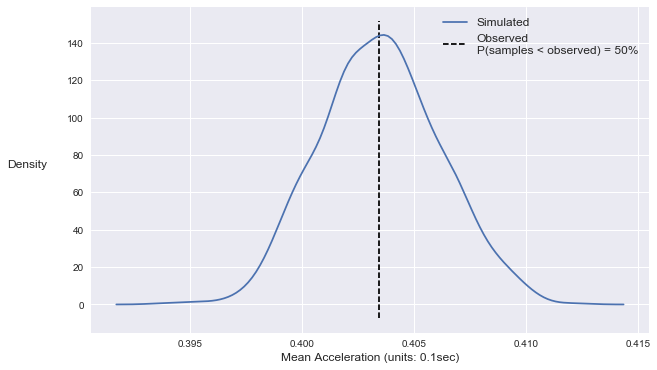

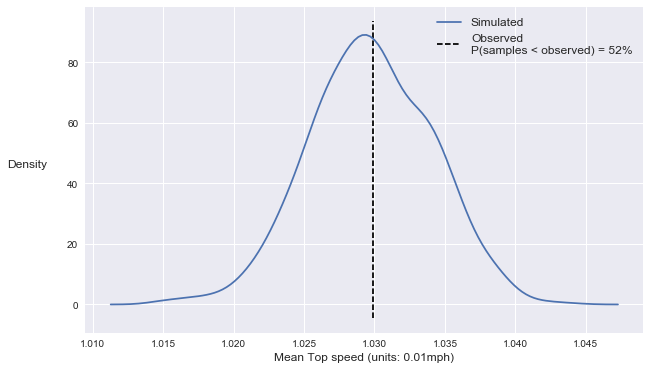

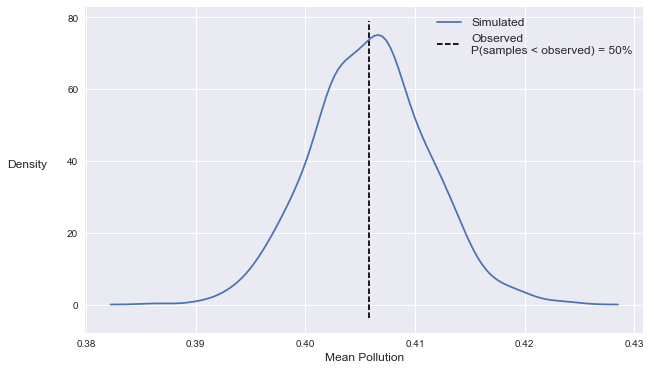

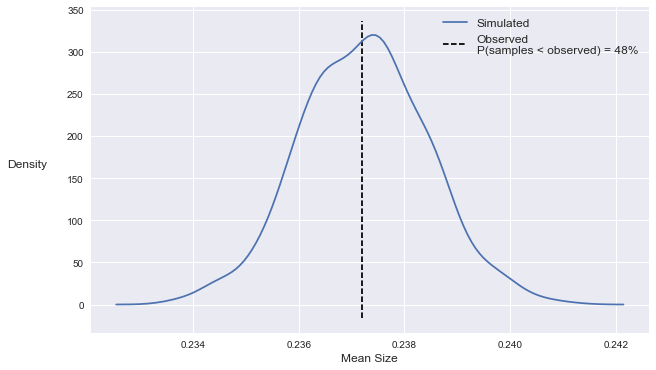

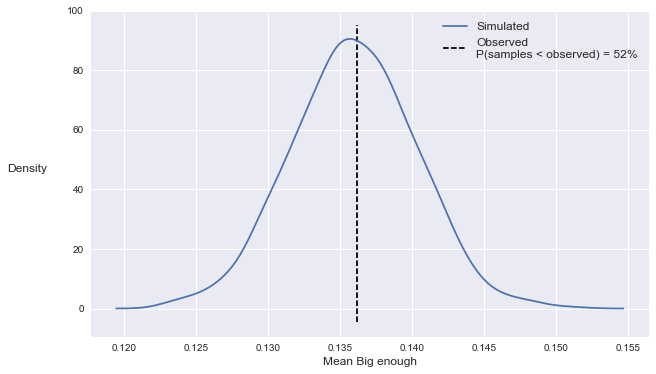

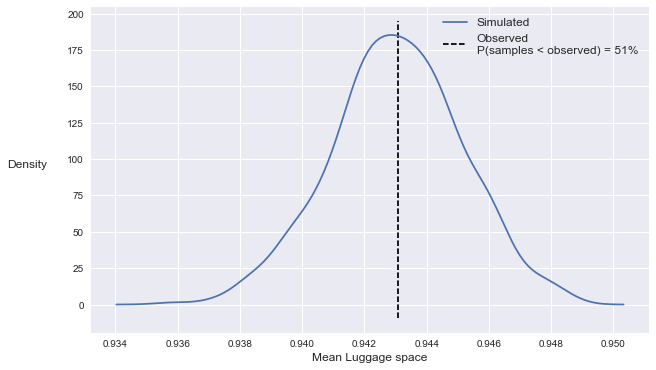

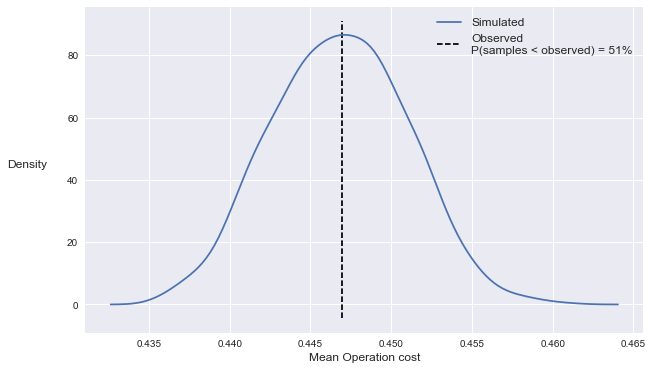

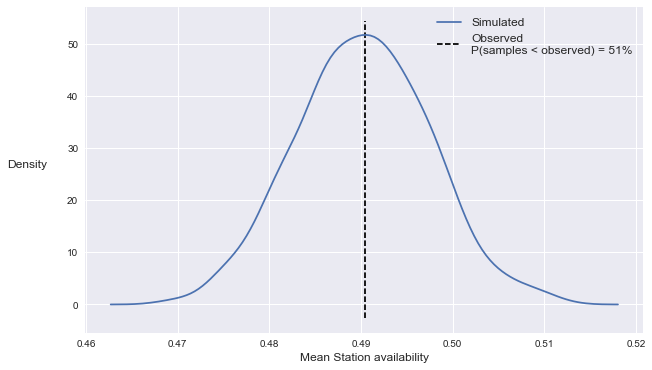

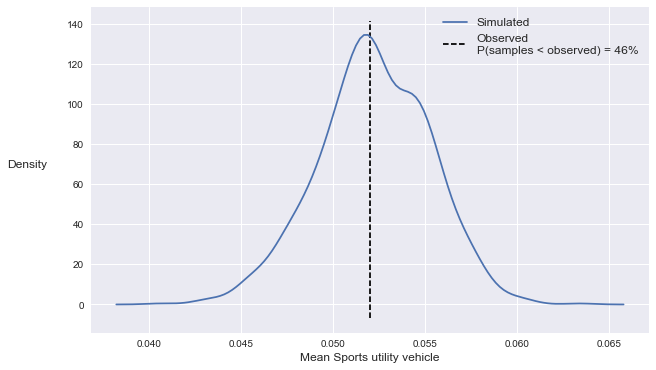

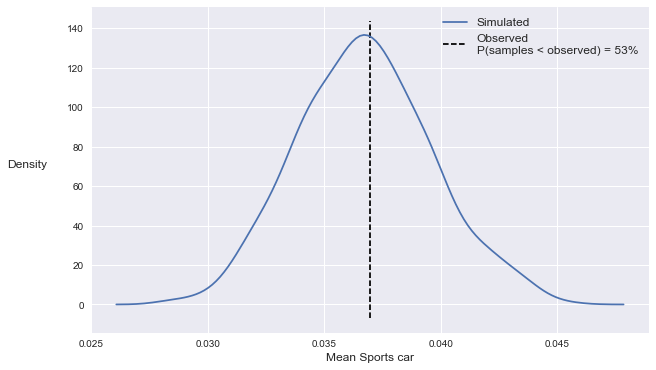

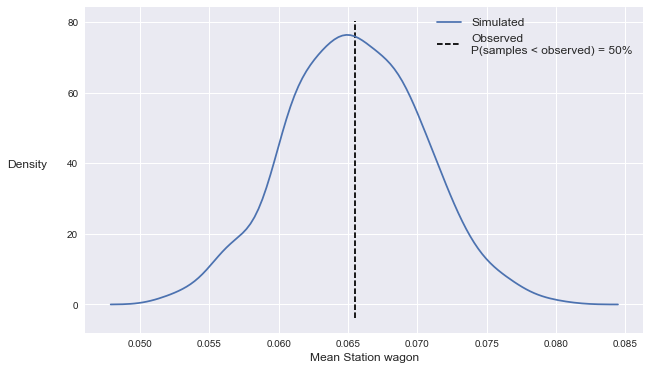

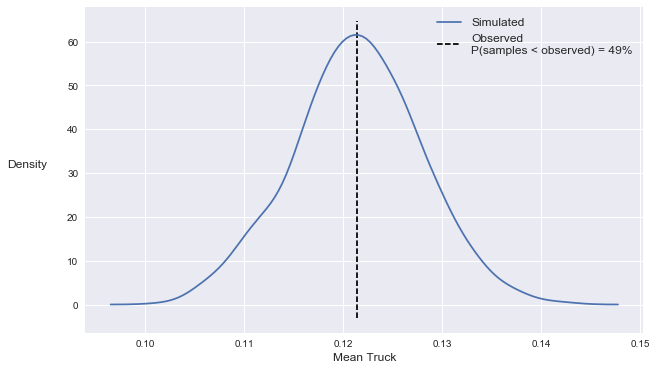

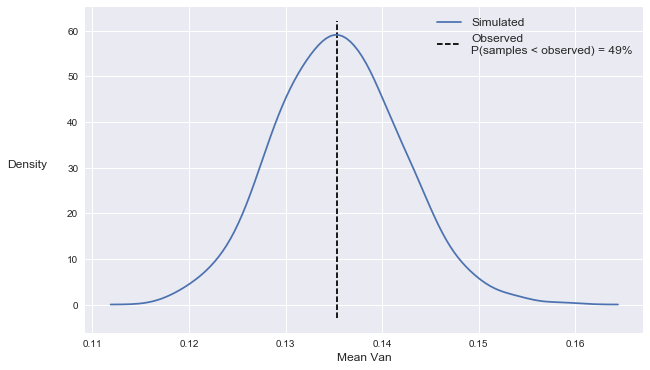

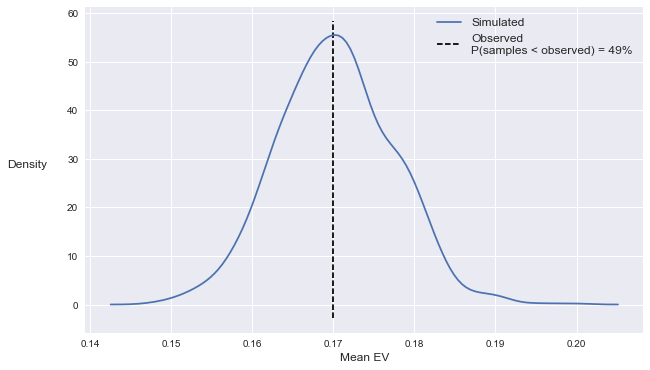

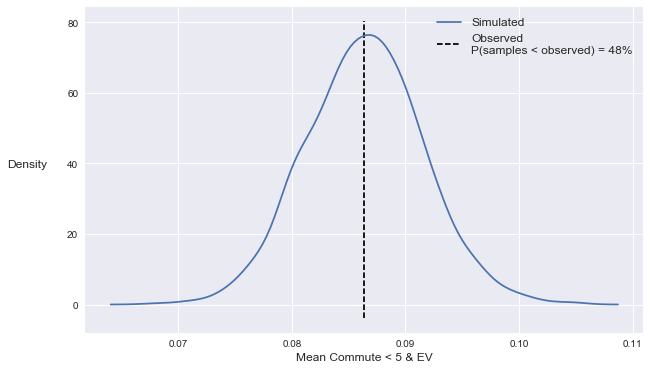

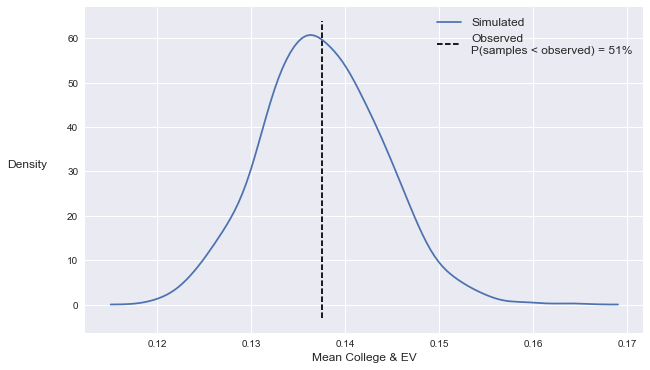

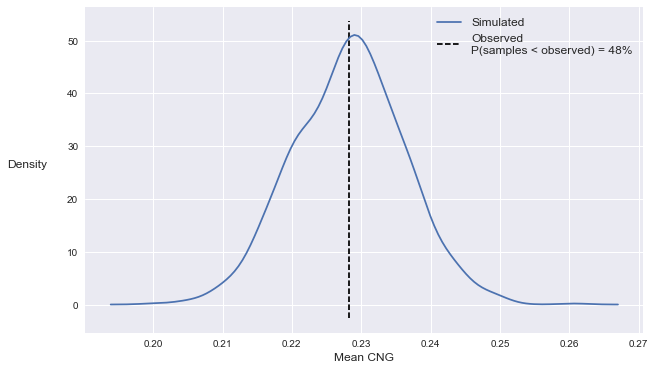

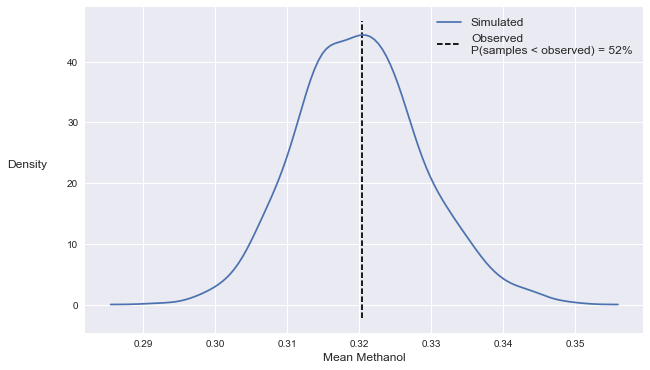

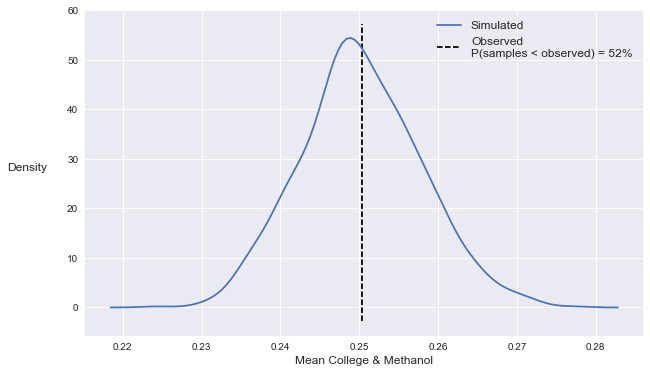

In [47]:
num_choices = car_mnl.choices.sum()

for i in list(range(car_mnl.design.shape[1])):
    design_column = i
    column_name = car_mnl.params.index.values[design_column]

    x_values = car_mnl.design[:, design_column]

    sim_constraint = likelihood_sim_y.T.dot(x_values) / num_choices

    obs_constraint = car_mnl.choices.dot(x_values) / num_choices

    constraint_path = None
    viz.plot_predicted_log_likelihoods(sim_constraint,
                                       obs_constraint,
                                       x_label='Mean {}'.format(column_name),
                                       output_file=constraint_path)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matp

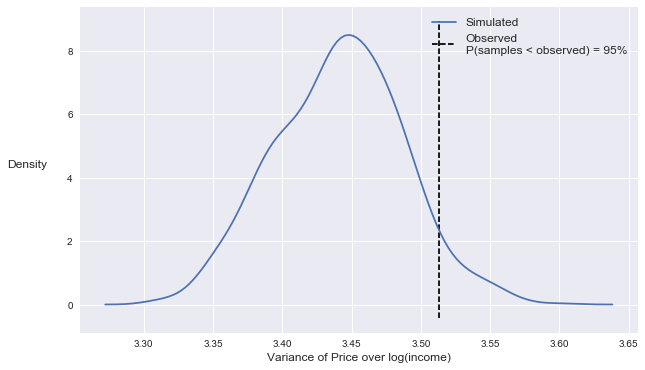

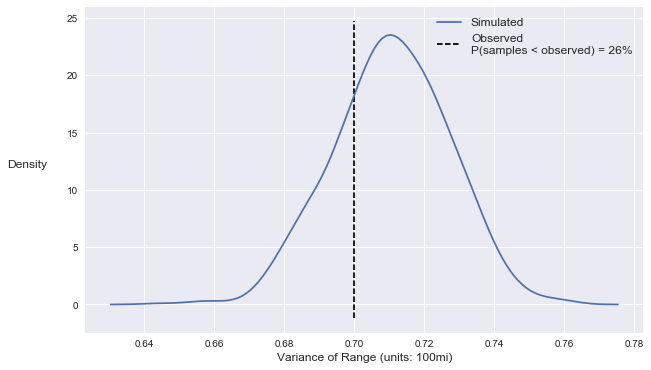

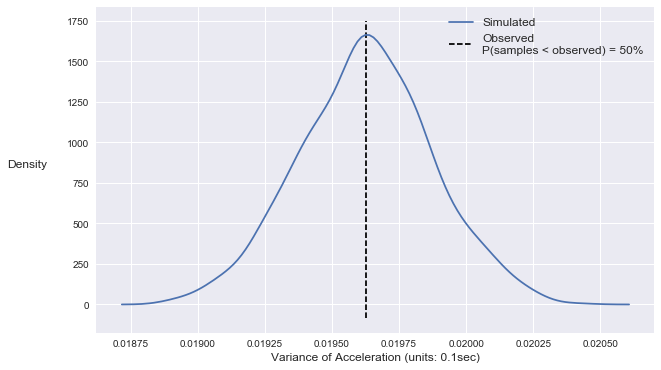

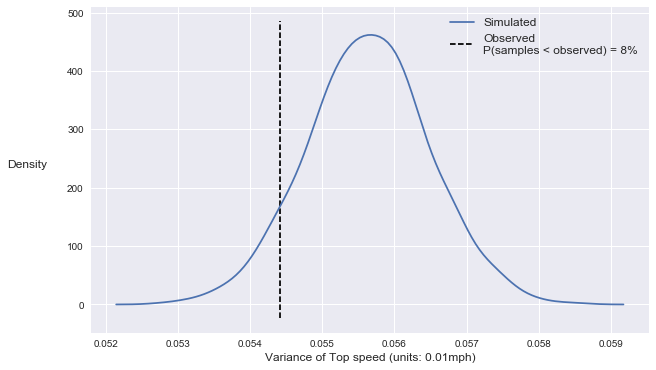

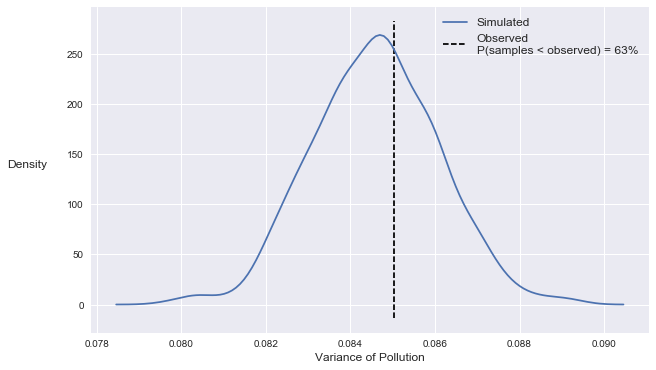

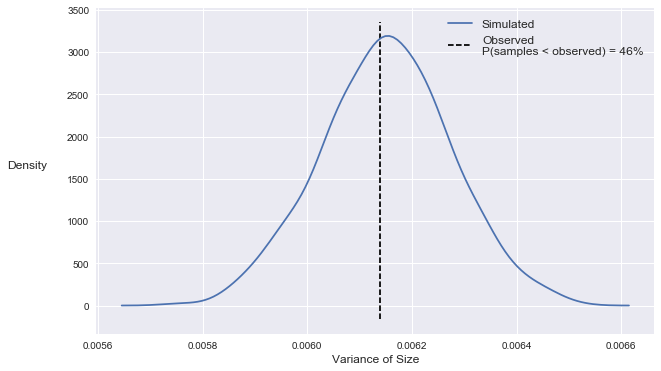

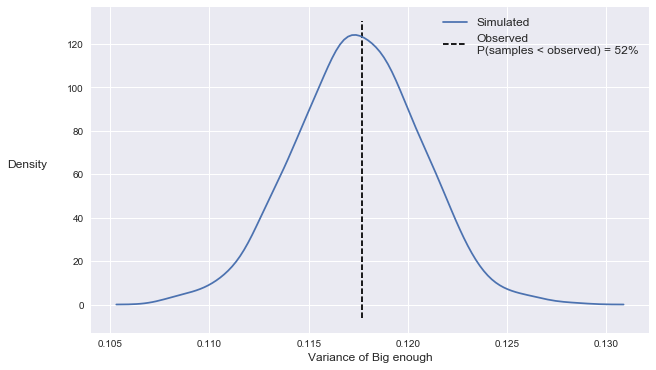

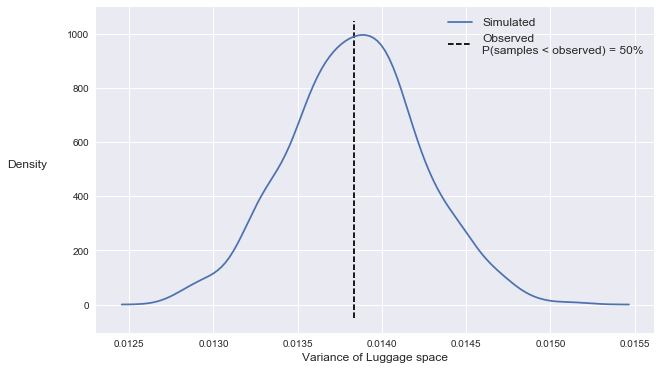

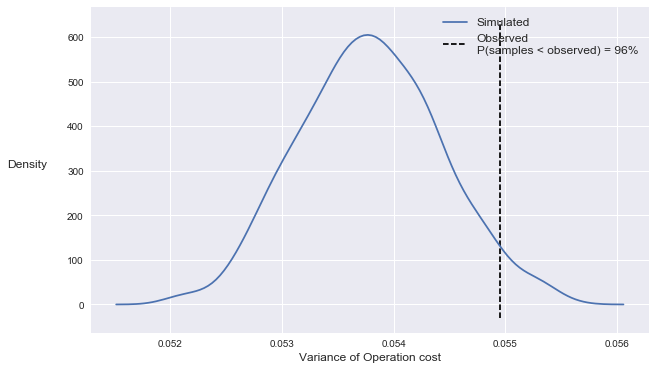

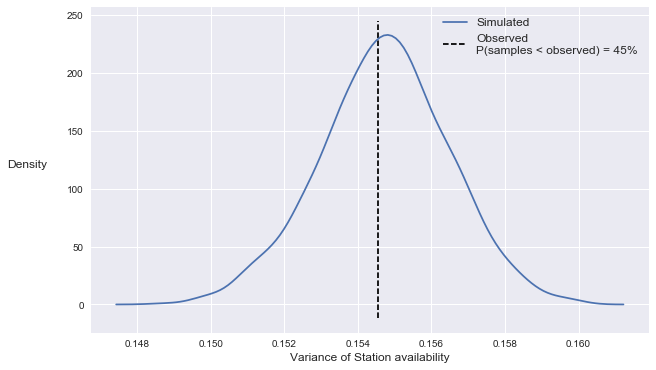

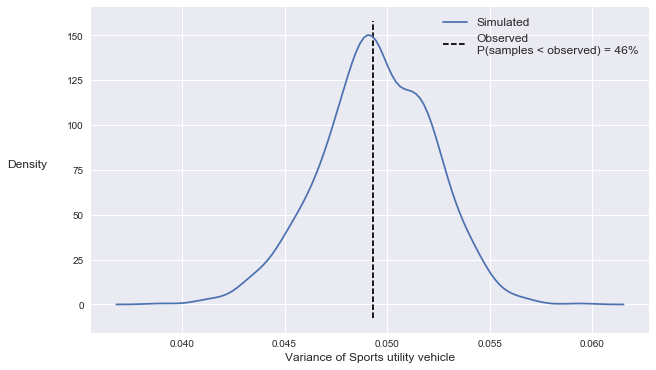

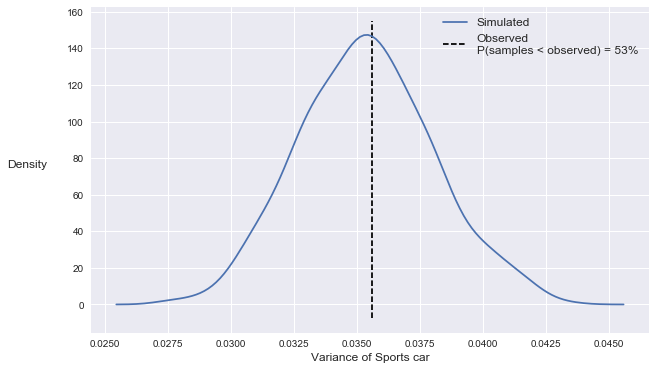

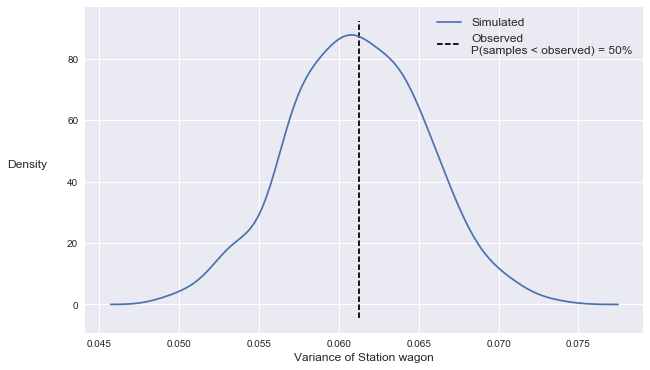

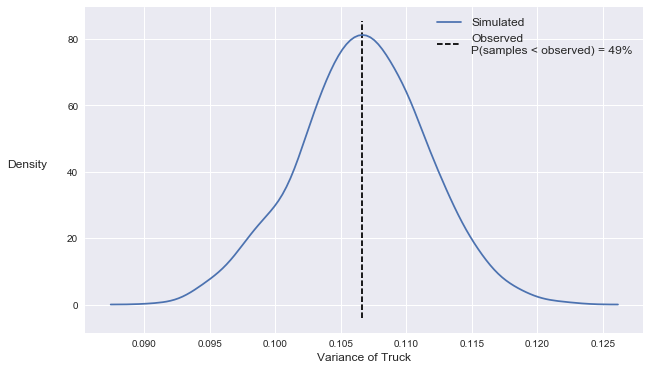

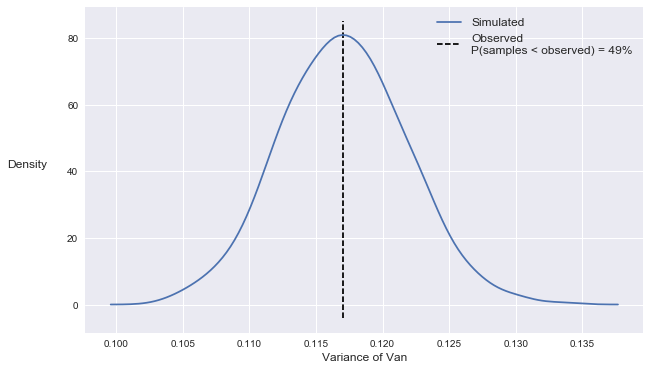

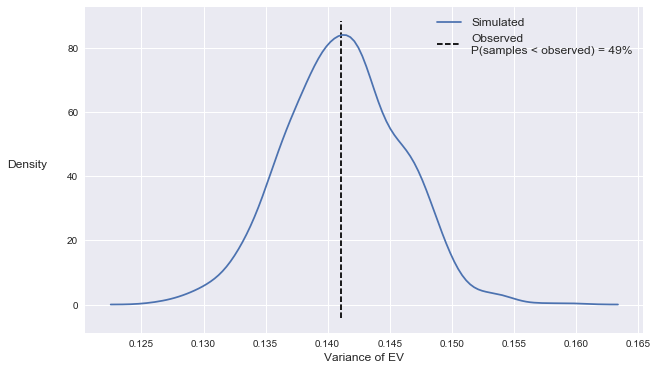

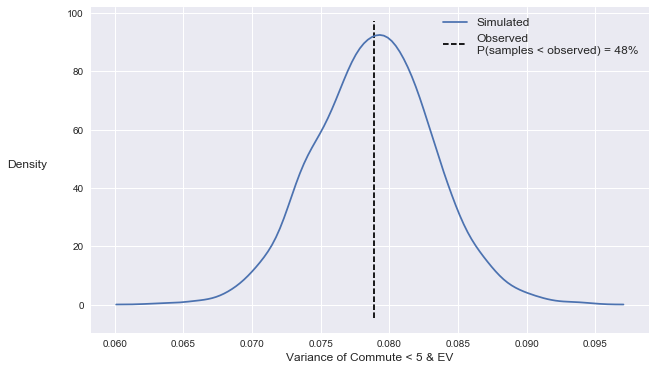

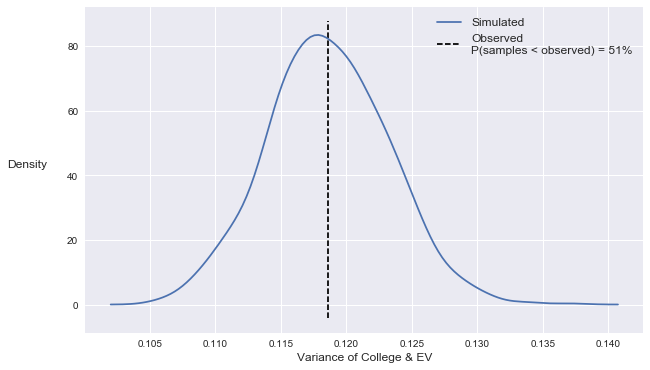

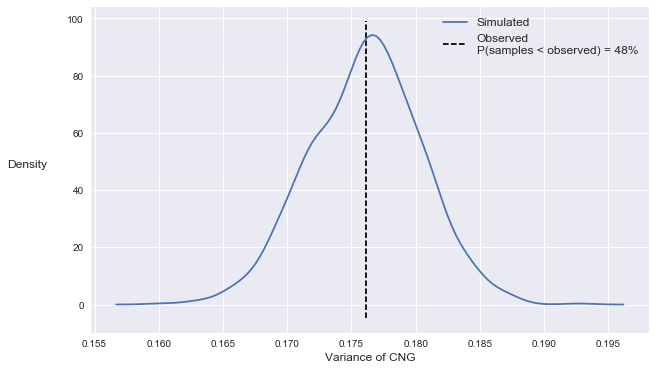

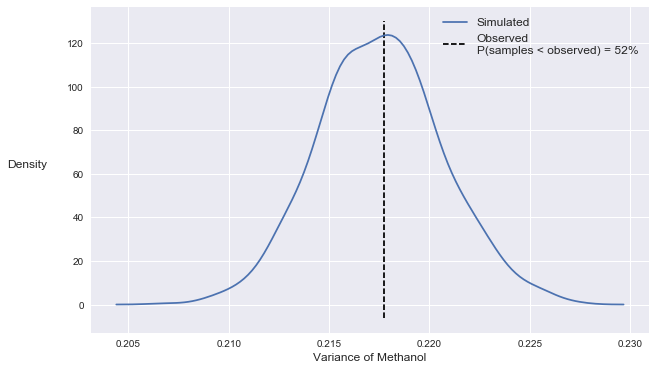

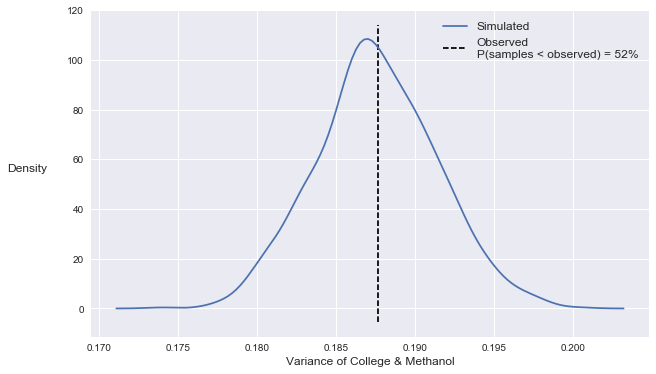

In [46]:
num_choices = car_mnl.choices.sum()

def calc_variance(y, x):
    num_obs = y.sum(axis=0)
    x_mean = y.T.dot(x) / num_obs
    x_squared_mean = y.T.dot(x**2) / num_obs
    x_variance = x_squared_mean - (x_mean)**2
    return x_variance

for i in list(range(car_mnl.design.shape[1])):
    design_column = i
    column_name = car_mnl.params.index.values[design_column]

    x_values = car_mnl.design[:, design_column]

    sim_variance = calc_variance(likelihood_sim_y, x_values)

    obs_variance = calc_variance(car_mnl.choices, x_values)

    variance_path = None
    viz.plot_predicted_log_likelihoods(sim_variance,
                                       obs_variance,
                                       x_label='Variance of {}'.format(column_name),
                                       output_file=variance_path)

In [45]:
(pd.DataFrame(car_mnl.design,
              columns=car_mnl.params.index)
   .describe().T['std']**2)

Price over log(income)          3.595913
Range (units: 100mi)            0.889796
Acceleration (units: 0.1sec)    0.020556
Top speed (units: 0.01mph)      0.057810
Pollution                       0.091894
Size                            0.006235
Big enough                      0.112730
Luggage space                   0.016803
Operation cost                  0.058020
Station availability            0.160206
Sports utility vehicle          0.036123
Sports car                      0.030522
Station wagon                   0.133872
Truck                           0.160932
Van                             0.146817
EV                              0.186986
Commute < 5 & EV                0.105035
College & EV                    0.154978
CNG                             0.188132
Methanol                        0.187811
College & Methanol              0.155683
Name: std, dtype: float64

### 2. Outcome Boxplot

Unique x-values: 100%|██████████| 4/4 [00:00<00:00, 22.12it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


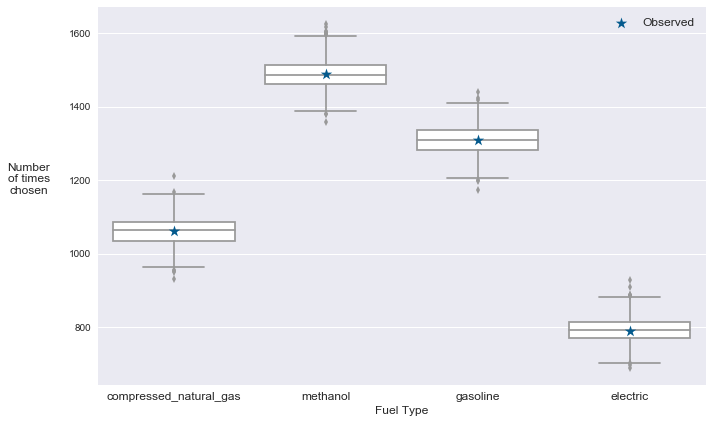

In [11]:
reload(viz)
market_path = '../reports/figures/market-share-plot-vehicle-choice-mnl.pdf'

market_dict = dict(cng='compressed_natural_gas')

viz.plot_simulated_market_shares(car_df.fuel_type.values,
                                 likelihood_sim_y,
                                 car_df.choice.values,
                                 x_label='Fuel Type',
                                 y_label='Number\nof times\nchosen',
                                 display_dict=market_dict,
                                 output_file=market_path)

Unique x-values: 100%|██████████| 6/6 [00:00<00:00, 33.58it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


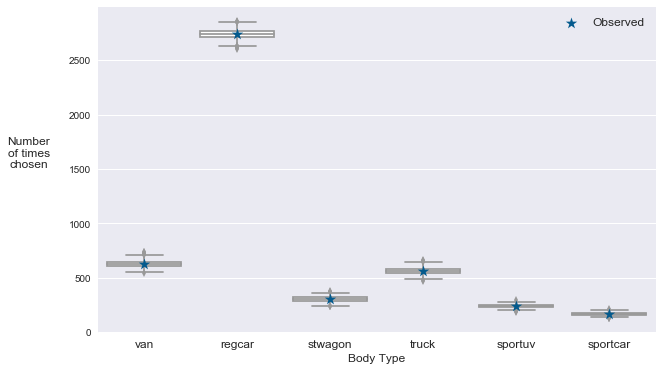

In [12]:
reload(viz)
viz.plot_simulated_market_shares(car_df.body_type.values,
                                 likelihood_sim_y,
                                 car_df.choice.values,
                                 x_label='Body Type',
                                 y_label='Number\nof times\nchosen')

### 3. Binned Reliability Plot

Plotting: 100%|██████████| 1/1 [00:00<00:00, 110.47it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


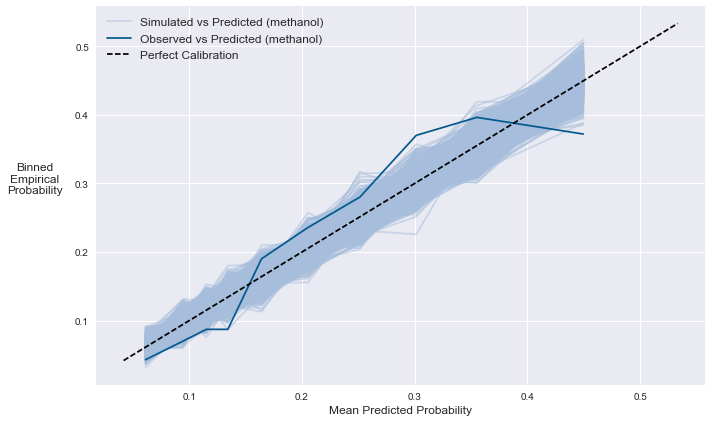

In [13]:
reload(viz)
current_fuel = 'methanol'
filter_idx = np.where((car_df.fuel_type == current_fuel).values)[0]
# current_probs = simulated_probs[filter_idx, :]
current_probs = car_mnl.long_fitted_probs[filter_idx]
current_choices = car_mnl.choices[filter_idx]
current_sim_y = likelihood_sim_y[filter_idx, :]
current_line_label = 'Observed vs Predicted ({})'.format(current_fuel)
current_sim_label = 'Simulated vs Predicted ({})'.format(current_fuel)

current_sim_color = '#a6bddb'
current_obs_color = '#045a8d'

# viz.plot_binned_reliability(
#     current_probs,
#     current_choices,
#     sim_y=current_sim_y,
#     line_label=current_line_label,
#     line_color=current_obs_color,
#     sim_label=current_sim_label,
#     sim_line_color=current_sim_color,
#     figsize=(10, 6),
#     ref_line=True,
#     output_file='../reports/figures/reliability-plot-vehicle-choice-mnl-methanol-point.pdf')

viz.plot_binned_reliability(
    current_probs,
    current_choices,
    sim_y=current_sim_y,
    line_label=current_line_label,
    line_color=current_obs_color,
    sim_label=current_sim_label,
    sim_line_color=current_sim_color,
    figsize=(10, 6),
    ref_line=True,
    output_file='../reports/figures/reliability-plot-vehicle-choice-mnl-methanol-point.jpeg')

###  4. Binned Marginal Model Plot

Plotting: 100%|██████████| 1000/1000 [00:03<00:00, 289.33it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


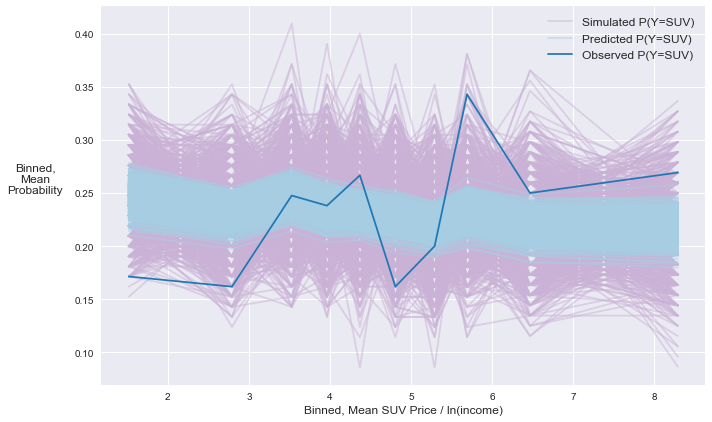

In [14]:
current_body = 'sportuv'
selection_idx = (car_df.body_type == current_body).values

num_traces = 500
current_probs = simulated_probs[selection_idx]
current_y = car_df.loc[selection_idx, 'choice'].values
current_x = car_df.loc[selection_idx, 'price_over_log_income'].values
current_sim_y = likelihood_sim_y[selection_idx]

# filename =\
#     '../reports/figures/marginal-model-plot-vehicle-choice-mnl-suv.pdf'
filename =\
    '../reports/figures/marginal-model-plot-vehicle-choice-mnl-suv.jpeg'

viz.make_binned_marginal_model_plot(current_probs,
                                    current_y,
                                    current_x,
                                    partitions=10,
                                    sim_y=current_sim_y,
                                    y_label='Observed P(Y=SUV)',
                                    prob_label='Predicted P(Y=SUV)',
                                    sim_label='Simulated P(Y=SUV)',
                                    x_label='Binned, Mean SUV Price / ln(income)',
                                    alpha=0.5,
                                    figsize=(10, 6),
                                    output_file=filename)

### 5. Simulated Histogram

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


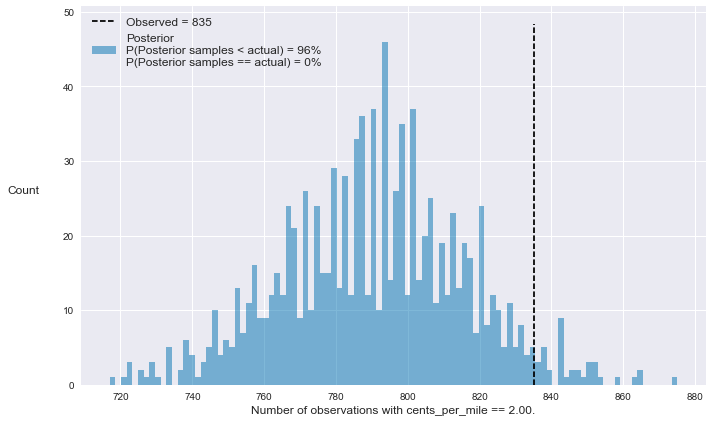

In [15]:
reload(viz)

filter_row = ((car_df.body_type == 'regcar') &
              (car_df.cents_per_mile == 2))
# current_title = 'Num Observations by Cents per Mile for Body = {}'
current_title = ''
# filename =\
#     '../reports/figures/histogram-vehicle-choice-mnl-regcar-operating-costs.pdf'
filename =\
    '../reports/figures/histogram-vehicle-choice-mnl-regcar-operating-costs.jpeg'

viz.plot_categorical_predictive_densities(
    car_df,
    None,
    likelihood_sim_y,
    'cents_per_mile',
    filter_row,
    car_mnl.choices,
    title=current_title.format('Regular Car'),
    filter_name='observations',
    post_color=sbn.color_palette('colorblind')[0],
    figsize=(10, 6),
    legend_loc='upper left',
    output_file=filename)

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


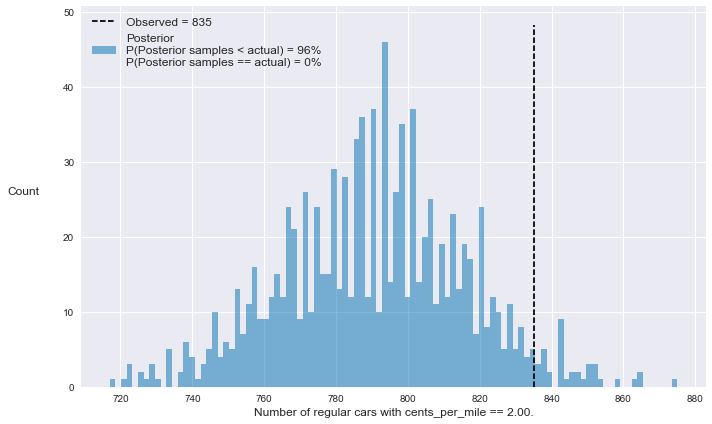

In [14]:
reload(viz)

filter_row = ((car_df.body_type == 'regcar') &
              (car_df.cents_per_mile == 2))
# current_title = 'Num Observations by Cents per Mile for Body = {}'
current_title = ''
# filename =\
#     '../reports/figures/histogram-vehicle-choice-mnl-regcar-operating-costs.pdf'
filename =\
    '../reports/figures/histogram-vehicle-choice-mnl-regcar-operating-costs_v2.jpeg'

viz.plot_categorical_predictive_densities(
    car_df,
    None,
    likelihood_sim_y,
    'cents_per_mile',
    filter_row,
    car_mnl.choices,
    title=current_title.format('Regular Car'),
    filter_name='regular cars',
    post_color=sbn.color_palette('colorblind')[0],
    figsize=(10, 6),
    legend_loc='upper left',
    output_file=filename)

### 6. Simulated KDE

Calculating KDEs: 100%|██████████| 500/500 [00:02<00:00, 204.58it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


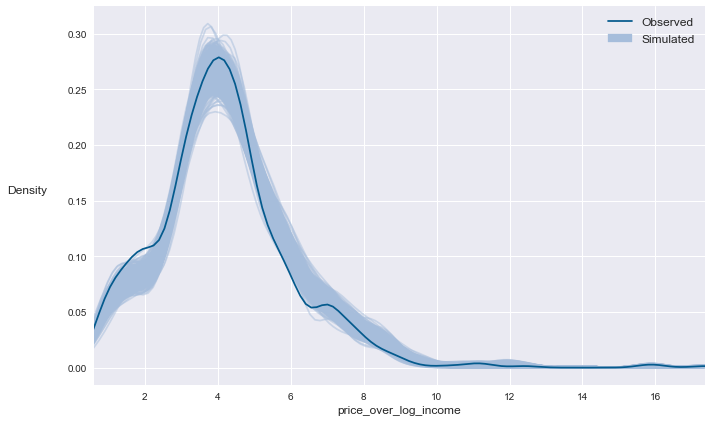

In [16]:
reload(viz)
current_fuel = 'electric'
filter_row = car_df.fuel_type == current_fuel
# current_title = 'KDE of Price/log(income) for {} vehicles'
current_title = ''
filename =\
    '../reports/figures/kde-vehicle-choice-mnl-electric-price.pdf'

viz.plot_simulated_kde_traces(likelihood_sim_y,
                              car_df,
                              filter_row,
                              'price_over_log_income',
                              'choice',
                              title=current_title.format(current_fuel),
                              figsize=(10, 6),
                              label='Simulated',
                              n_traces=500,
                              output_file=filename)

### 7. Simulated CDF

Calculating CDFs: 100%|██████████| 1000/1000 [00:03<00:00, 300.83it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


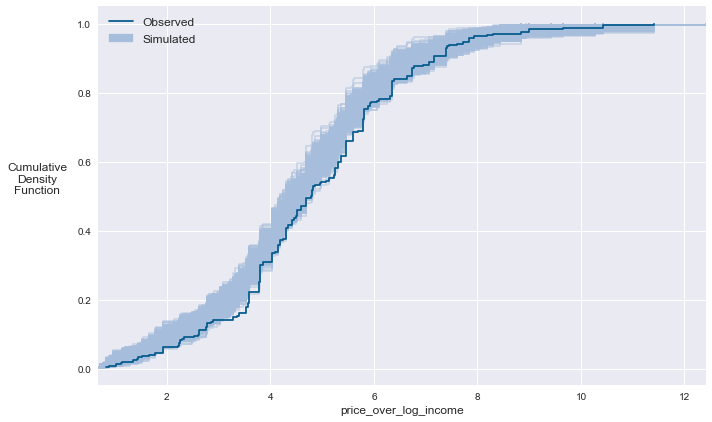

In [17]:
reload(viz)
current_body = 'sportuv'
filter_row = car_df.body_type == current_body
# current_title =\
#     'CDF of Price/log(income) for Sport Utility Vehicles'
current_title = ''
# filename =\
#     '../reports/figures/cdf-vehicle-choice-mnl-suv-price.pdf'
filename =\
    '../reports/figures/cdf-vehicle-choice-mnl-suv-price.jpeg'

viz.plot_simulated_cdf_traces(likelihood_sim_y,
                              car_df,
                              filter_row,
                              'price_over_log_income',
                              'choice',
                              label='Simulated',
                              title=current_title,
                              figsize=(10, 6),
                              output_file=filename)

## Sandbox:
Look at additional plots.

Plotting: 100%|██████████| 1000/1000 [00:03<00:00, 291.75it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 1000/1000 [00:04<00:00, 249.14it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 1000/1000 [00:03<00:00, 277.79it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 1000/1000 [00:03<00:00, 278.92it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figur

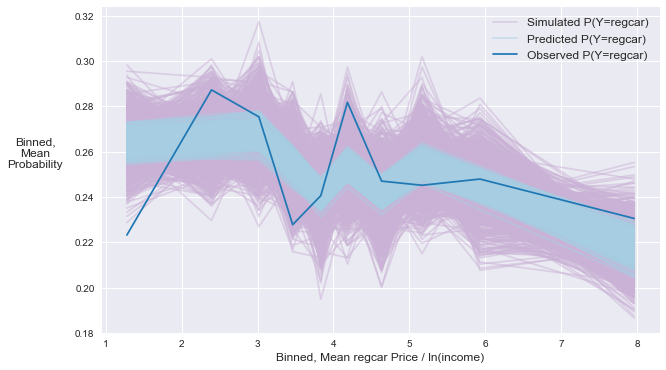

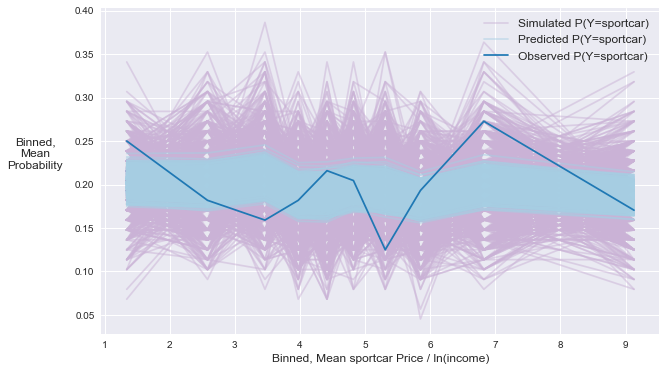

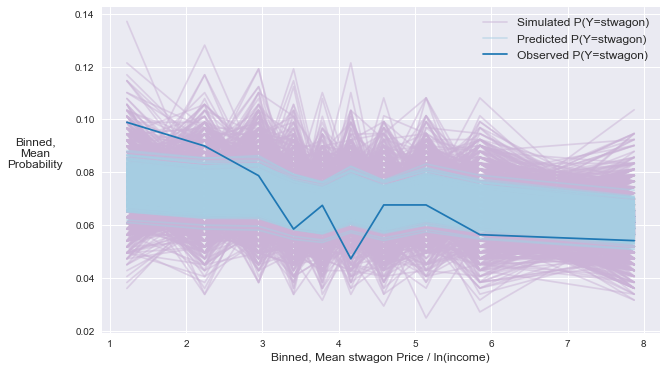

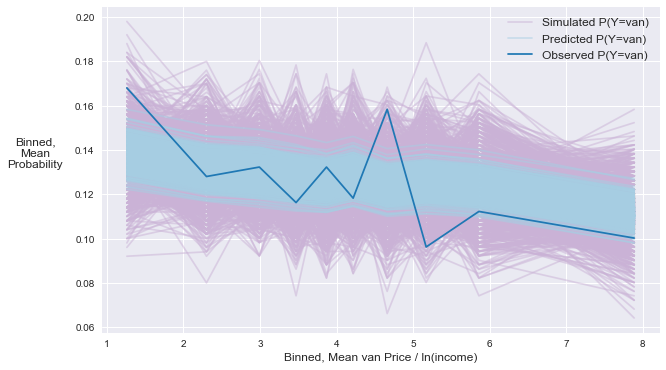

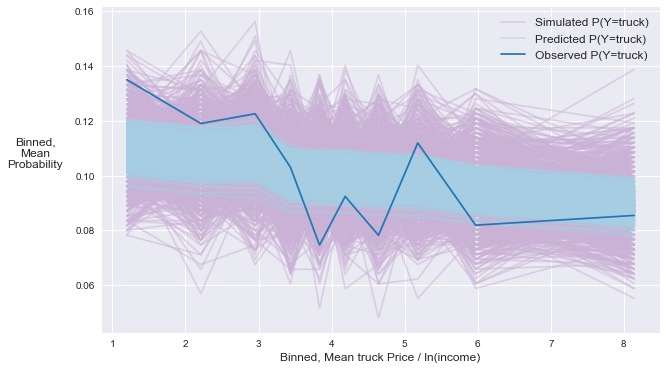

In [18]:
for body in ['regcar', 'sportcar', 'stwagon', 'van', 'truck']:
    current_body = body
    selection_idx = (car_df.body_type == current_body).values

    num_traces = 500
    current_probs = simulated_probs[selection_idx]
    current_y = car_df.loc[selection_idx, 'choice'].values
    current_x = car_df.loc[selection_idx, 'price_over_log_income'].values
    current_sim_y = likelihood_sim_y[selection_idx]

    filename = None

    viz.make_binned_marginal_model_plot(current_probs,
                                        current_y,
                                        current_x,
                                        partitions=10,
                                        sim_y=current_sim_y,
                                        y_label='Observed P(Y={})'.format(body),
                                        prob_label='Predicted P(Y={})'.format(body),
                                        sim_label='Simulated P(Y={})'.format(body),
                                        x_label='Binned, Mean {} Price / ln(income)'.format(body),
                                        alpha=0.5,
                                        figsize=(10, 6),
                                        output_file=filename)

Calculating CDFs: 100%|██████████| 1000/1000 [00:04<00:00, 240.80it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating CDFs: 100%|██████████| 1000/1000 [00:04<00:00, 225.06it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating CDFs: 100%|██████████| 1000/1000 [00:03<00:00, 259.78it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating CDFs: 100%|██████████| 1000/1000 [00:03<00:00, 252.96it/s]
/Users/timothyb0912/anaconda/lib/python2.

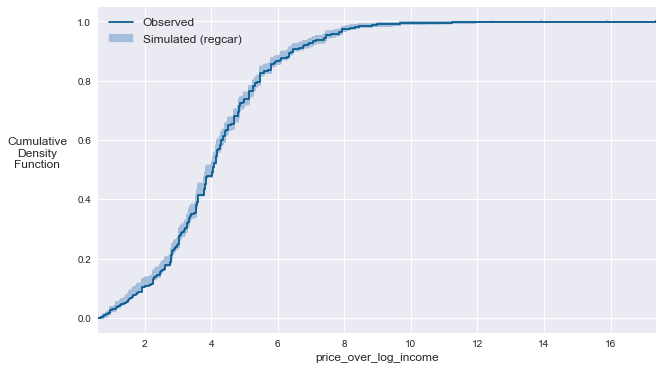

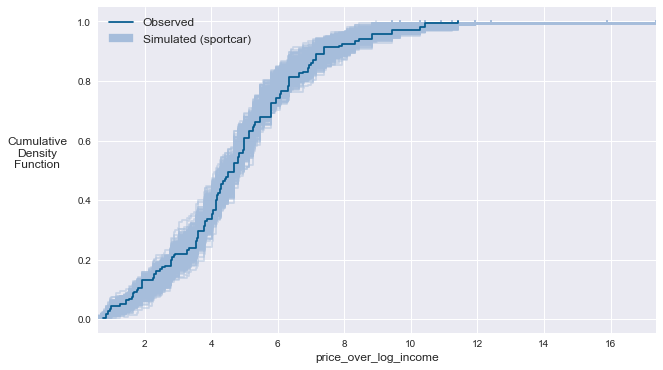

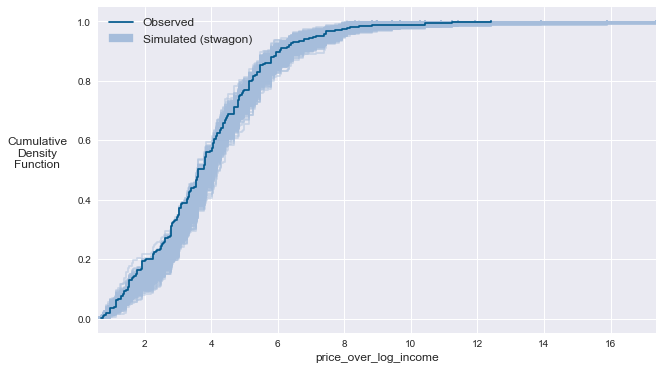

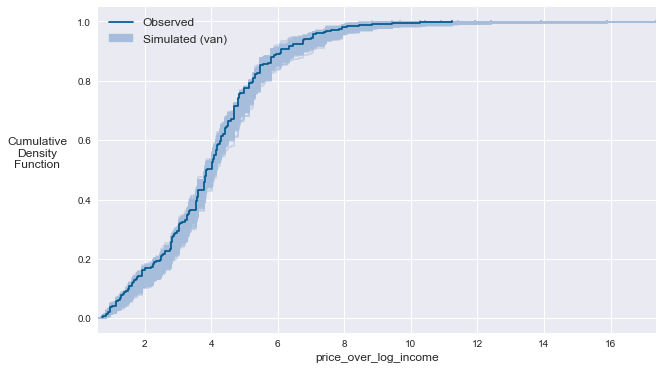

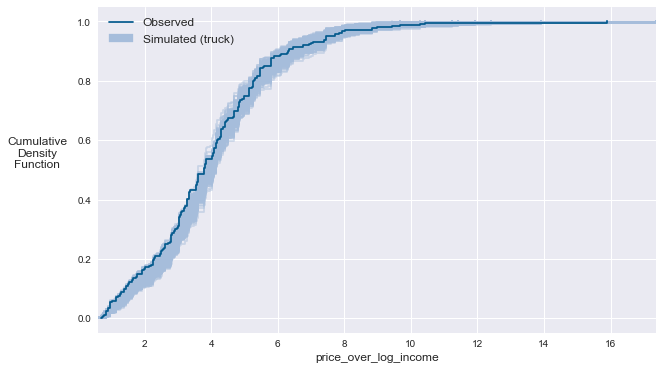

In [19]:
for body in ['regcar', 'sportcar', 'stwagon', 'van', 'truck']:
    current_body = body
    filter_row = car_df.body_type == current_body
    # current_title =\
    #     'CDF of Price/log(income) for Sport Utility Vehicles'
    current_title = ''
    filename = None
    viz.plot_simulated_cdf_traces(likelihood_sim_y,
                                  car_df,
                                  filter_row,
                                  'price_over_log_income',
                                  'choice',
                                  label='Simulated ({})'.format(body),
                                  title=current_title,
                                  figsize=(10, 6),
                                  output_file=filename)

Plotting: 100%|██████████| 1/1 [00:00<00:00, 122.34it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 1/1 [00:00<00:00, 133.85it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 1/1 [00:00<00:00, 99.18it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 1/1 [00:00<00:00, 123.39it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: ma

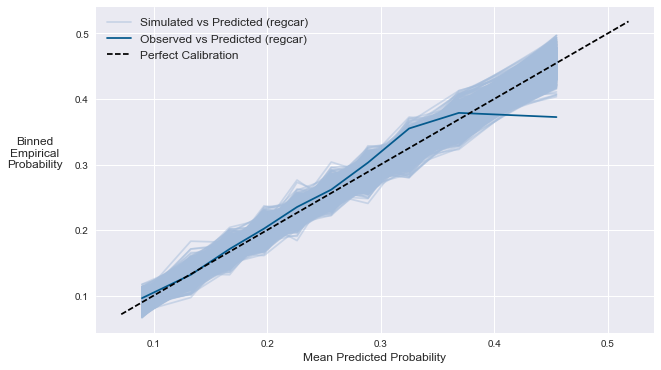

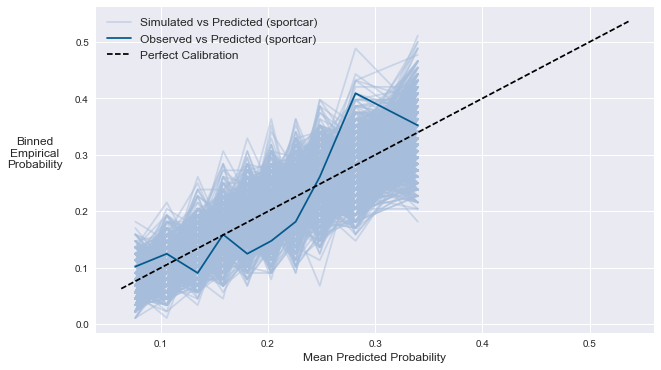

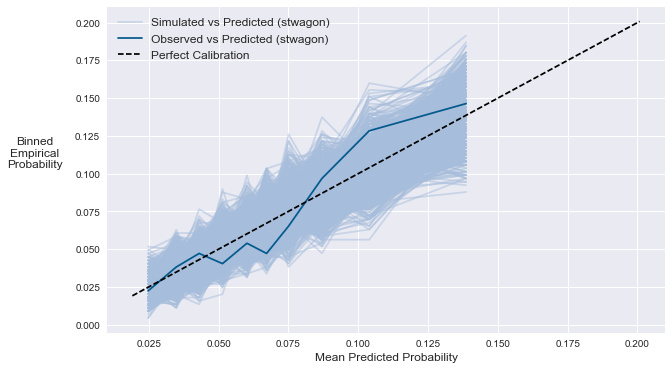

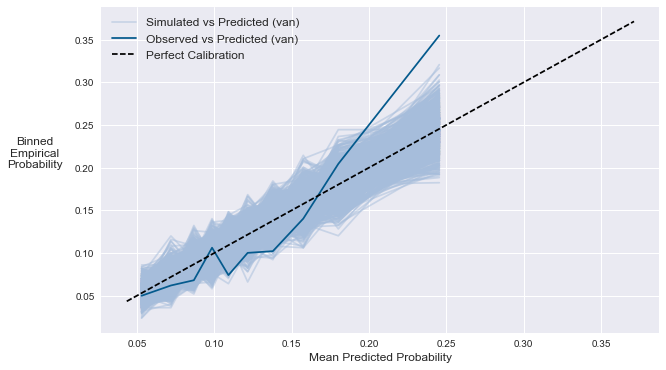

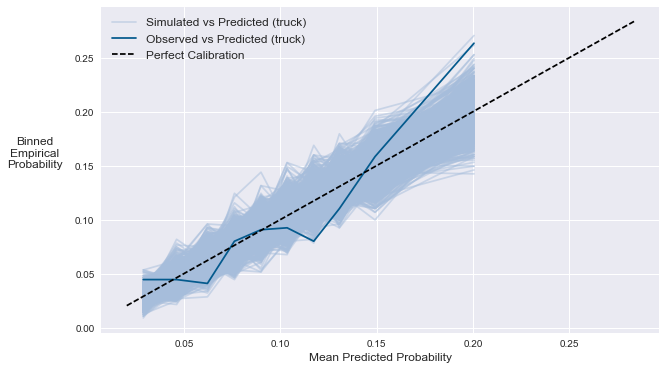

In [20]:
for body in ['regcar', 'sportcar', 'stwagon', 'van', 'truck']:
    filter_idx = (car_df.body_type == body).values
    current_probs = car_mnl.long_fitted_probs[filter_idx]
    current_choices = car_mnl.choices[filter_idx]
    current_sim_y = likelihood_sim_y[filter_idx, :]
    current_line_label = 'Observed vs Predicted ({})'.format(body)
    current_sim_label = 'Simulated vs Predicted ({})'.format(body)

    current_sim_color = '#a6bddb'
    current_obs_color = '#045a8d'

    reliability_path = None
    viz.plot_binned_reliability(
        current_probs,
        current_choices,
        sim_y=current_sim_y,
        line_label=current_line_label,
        line_color=current_obs_color,
        sim_label=current_sim_label,
        sim_line_color=current_sim_color,
        figsize=(10, 6),
        ref_line=True,
        output_file=reliability_path)

Plotting: 100%|██████████| 1/1 [00:00<00:00, 107.73it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 1/1 [00:00<00:00, 122.48it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 1/1 [00:00<00:00, 119.11it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


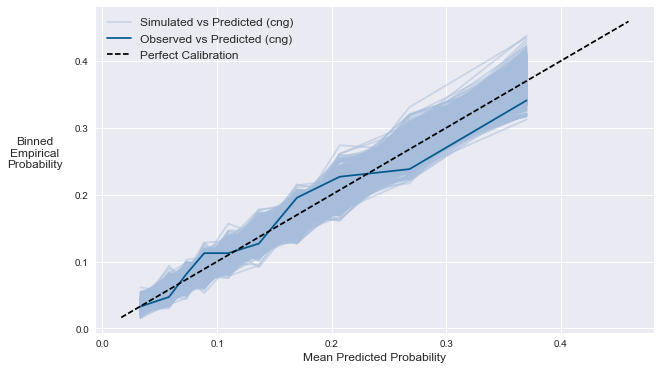

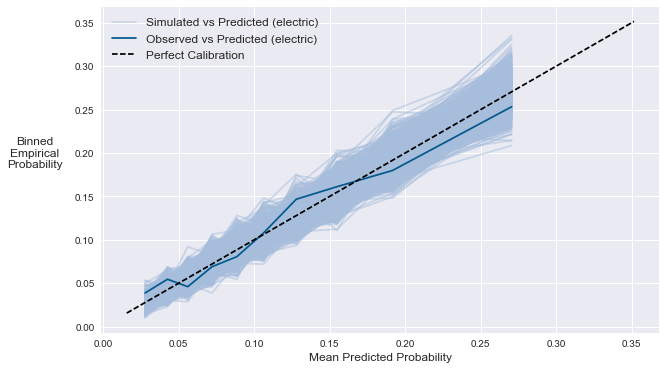

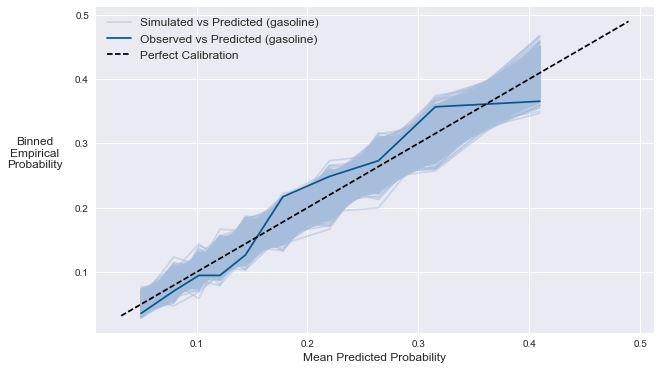

In [21]:
for fuel in ['cng', 'electric', 'gasoline']:
    current_fuel = fuel
    filter_idx = np.where((car_df.fuel_type == current_fuel).values)[0]
    current_probs = car_mnl.long_fitted_probs[filter_idx]
    current_choices = car_mnl.choices[filter_idx]
    current_sim_y = likelihood_sim_y[filter_idx, :]
    current_line_label = 'Observed vs Predicted ({})'.format(current_fuel)
    current_sim_label = 'Simulated vs Predicted ({})'.format(current_fuel)

    current_sim_color = '#a6bddb'
    current_obs_color = '#045a8d'

    reliability_path = None
    viz.plot_binned_reliability(
        current_probs,
        current_choices,
        sim_y=current_sim_y,
        line_label=current_line_label,
        line_color=current_obs_color,
        sim_label=current_sim_label,
        sim_line_color=current_sim_color,
        figsize=(10, 6),
        ref_line=True,
        output_file=reliability_path)